#### Data is the lifeblood of financial institutions and other organizations. It is used to run processes, manage financials, predict risk, prove compliance, target customers, and influence decisions. In anti-money laundering (AML) and compliance, the data required to identify and combat financial crime is complex.

 Emerging payment technologies and the digitalization of banking have introduced yet another set of risks to the AML landscape.

Cyber risk, social media monitoring, and data management are all crucial considerations that have caught the attention of regulators, who have come to recognize that traditional, rules-based methodologies may not be optimal for certain typologies. Check-the-box compliance is not enough. Regulators expect banks to have defensive processes and systems in place to proactively seek out and catch perpetrators.

Suppose you work for a digital bank that offers credit card and deposit accounts as financial products and you've been asked to analyze some customers’ data to get insights about customers' profile considering both personal information and financial behavior to evaluate the feasibility of performing a cluster analysis within available data.

The segmentation purpose is to boost the Transaction Monitoring System performance to detect suspicious patterns. (Hint: a digital onboarding process captures short personal information, and to cope with this lack of personal information it would be interesting combining it with the financial behavior).

What frameworks and tools would you use to translate the data provided into useful information for the money laundering risk prevention/detection challenge? Share your insights
based on your quantitative analysis?


In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

In [146]:
df = pd.read_excel('Brandon Person_Information_Case_21.xlsx')

## Assessing data

In [147]:
df.head()

,id,contact_name,date_of_birth,email,state_of_address,card_account_id,card_account_since,deposit_account_id,deposit_account_since,inferred_income,salary_portability,avg_amount_transfer_in_same_cpf,avg_amount_transfer_in_other_cpf,avg_pay_account_balance,avg_amount_transfers_out_same_cpf,avg_amount_transfers_out_other_cpf,avg_amount_purchases,merchant_segment_purchases_concentration,credit_card_limit
0,j4-y3-7l-85,Alvis Ferreras,07/18/1992,aferreras0@hp.com,PR,e706d5cc-f2be-4cd3-86d4-8d5f4a12b694,05/26/2019,b48064d4-c9a5-4ed8-8e9e-832fc597b7a2,02/18/2018,1645.14,True,551.31,81.32,990.66,91.89,136.43,87.67,restaurants,64.01
1,29-li-gl-gn,Perry Cometto,04/29/1969,pcometto1@bigcartel.com,ES,64943b63-2fb0-4e2c-b8ff-96b4f11291ce,02/07/2015,f0c4b4b2-0009-4e3e-9c6c-7780614a4eee,04/09/2018,2004.18,True,1831.58,99.43,1755.35,142.13,93.14,18.22,health,50.00
2,pp-kh-jo-uf,Gaultiero Erricker,03/25/1962,gerricker2@biblegateway.com,MG,28846644-6cb5-4db3-8cae-dec76d428120,12/11/2016,a550f4ab-12a2-4b7f-8e3f-280bdeab2a95,12/17/2017,2147.42,True,664.93,141.98,1703.42,43.71,79.75,118.20,education,50.00
3,gc-yo-nr-8o,Emeline Goldis,04/16/1950,egoldis3@webnode.com,RS,0a9299ac-7b25-4abd-b32f-101e1ef903bc,08/05/2018,2da3c269-7139-4d57-bf5b-c6d40a0473b5,05/30/2019,5770.84,False,507.91,195.83,1149.32,166.58,88.52,121.29,automotive,50.00
4,e3-q9-3g-vn,Fina Sheddan,12/30/1967,fsheddan4@issuu.com,AL,44932b00-0763-457f-aa1a-8cca8d5d769f,11/19/2016,21e37a5f-791e-4f49-b103-2bd18d9bfa04,12/07/2018,2566.52,True,281.75,85.51,2823.80,29.58,70.71,42.40,health,69.15


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        4000 non-null   object 
 1   contact_name                              4000 non-null   object 
 2   date_of_birth                             4000 non-null   object 
 3   email                                     4000 non-null   object 
 4   state_of_address                          3982 non-null   object 
 5   card_account_id                           4000 non-null   object 
 6   card_account_since                        4000 non-null   object 
 7   deposit_account_id                        4000 non-null   object 
 8   deposit_account_since                     4000 non-null   object 
 9   inferred_income                           4000 non-null   float64
 10  salary_portability                  

In [149]:
#I created a today column to generate another column with age given birthdate colum 
today = np.repeat('2022-03-25',df.shape[0])
df['today'] = today

In [170]:
df['age'] = (((df['today'] - df['date_of_birth']).dt.days)/365.25).round(0)

In [151]:
# I changed columns formats to properly manipulate data later on
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.today = pd.to_datetime(df.today)
df.card_account_since = pd.to_datetime(df.card_account_since)
df.deposit_account_since = pd.to_datetime(df.deposit_account_since)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id                                        4000 non-null   object        
 1   contact_name                              4000 non-null   object        
 2   date_of_birth                             4000 non-null   datetime64[ns]
 3   email                                     4000 non-null   object        
 4   state_of_address                          3982 non-null   object        
 5   card_account_id                           4000 non-null   object        
 6   card_account_since                        4000 non-null   datetime64[ns]
 7   deposit_account_id                        4000 non-null   object        
 8   deposit_account_since                     4000 non-null   datetime64[ns]
 9   inferred_income               

In [152]:
# drop rows with null values in state_of_address
df.dropna(subset = ['state_of_address'], inplace=True)

In [153]:
# I created a Total Transfers colum so we identify people with most money transfered in average
df['Total_transfers'] = (df['avg_amount_transfer_in_same_cpf']) + (df['avg_amount_transfer_in_other_cpf']) + (df['avg_amount_transfers_out_same_cpf']) + (df['avg_amount_transfers_out_other_cpf'])

## SHOW BASIC STATS

In [154]:
df.describe()

,inferred_income,avg_amount_transfer_in_same_cpf,avg_amount_transfer_in_other_cpf,avg_pay_account_balance,avg_amount_transfers_out_same_cpf,avg_amount_transfers_out_other_cpf,avg_amount_purchases,credit_card_limit,Total_transfers
count,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000
mean,3356.354932,1029.581080,102.885741,2108.294289,100.732526,102.644618,103.892888,67.236494,1335.843965
std,1790.683093,553.590545,56.323637,1316.011148,55.661957,55.636996,55.543436,25.166056,564.764852
min,819.560000,0.260000,0.030000,1.750000,0.030000,0.270000,0.180000,50.000000,126.170000
25%,2035.040000,602.932500,59.940000,1057.130000,59.285000,62.262500,61.830000,50.000000,902.015000
50%,2952.925000,1022.000000,101.275000,2007.645000,96.910000,99.760000,102.510000,50.000000,1326.720000
75%,4252.202500,1399.695000,142.187500,2964.467500,138.672500,138.910000,142.292500,79.357500,1711.825000
max,15293.390000,3387.130000,311.440000,7633.290000,305.580000,320.200000,300.190000,197.750000,3786.110000


## It seems there is no correlation between variables

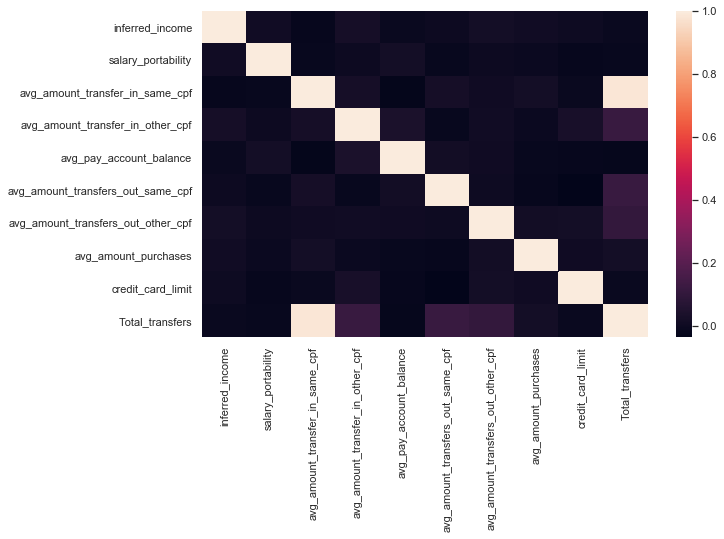

In [169]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr());

## Financial behavior Insights

1. Most clients' inferred income goes from 2,000 to 4,000 dollars in average
2. Most clients' balance value 1,000 to 3,000 have an amount of 1,000 to 3,000 dollars
3. Most clients' purchases with their credit card have a cost whose range is  60 to 140 dollars

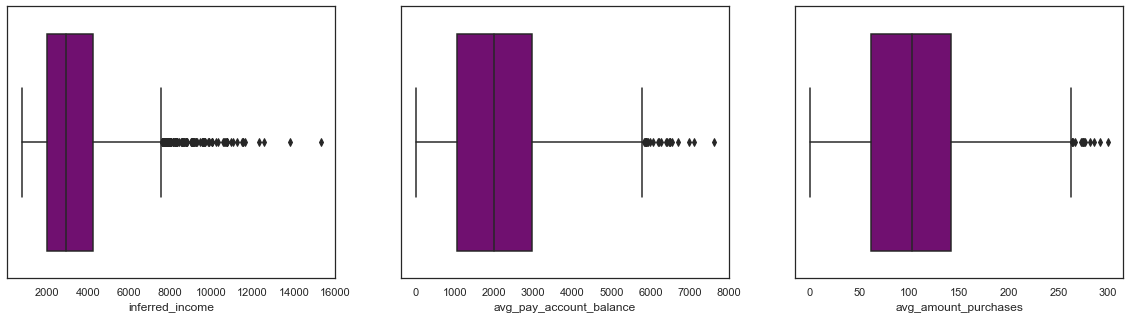

In [177]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(df['inferred_income'], ax=ax[0],color = 'purple');
sns.boxplot(df['avg_pay_account_balance'], ax=ax[1],color = 'purple');
sns.boxplot(df['avg_amount_purchases'], ax=ax[2],color = 'purple');

## Transactions behavior Insights

1. In average the monthly amount that customer receives in their deposit account from (him)herself is between 550 and 1,400 dollars
2. For all the clients the monthly amount that a customer receives in his/her deposit account from third parties is between 150 and 140 dollars, which represents a tenth part of their own transfers 

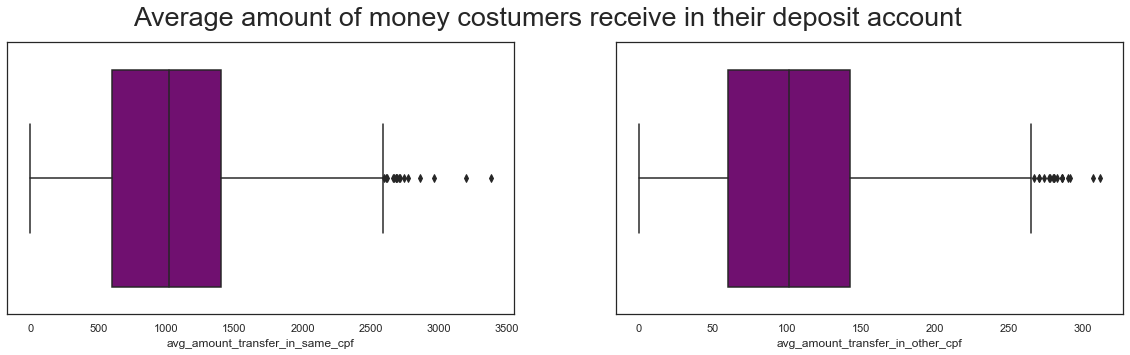

In [178]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
plt.suptitle('Average amount of money costumers receive in their deposit account', fontsize=27)
sns.boxplot(df['avg_amount_transfer_in_same_cpf'],  ax=ax[0],color = 'purple' );
sns.boxplot(df['avg_amount_transfer_in_other_cpf'],  ax=ax[1],color = 'purple' );

3. In average the monthly amount that customer sends from their deposit account to (him)herself or third parties is between 55 and 140 dollars

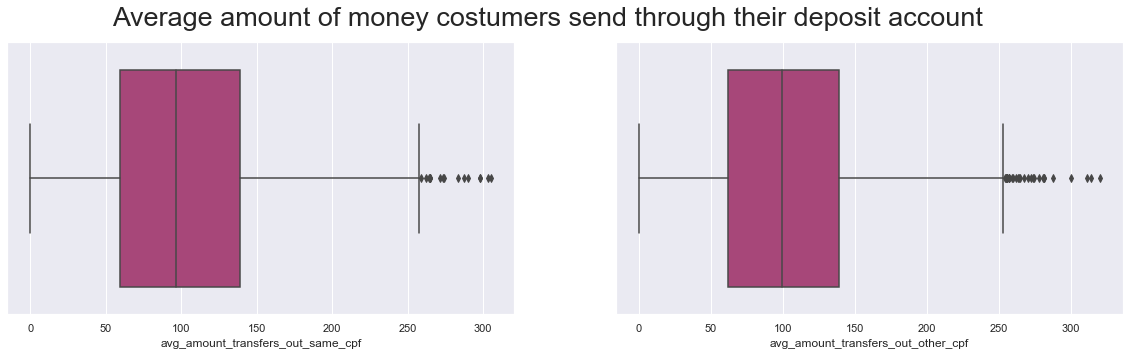

In [180]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
plt.suptitle('Average amount of money costumers send through their deposit account', fontsize=27)
sns.boxplot(df['avg_amount_transfers_out_same_cpf'],  ax=ax[0],palette = 'magma');
sns.boxplot(df['avg_amount_transfers_out_other_cpf'],  ax=ax[1],palette = 'magma');

1. Following a logical thinking, if clients have an inferred low income, their transfers should not be high between themselves or third parties. Here we can identify in the bottom right those people whose Total amount of transfers in average do not match with their  low come, suggesting a flag for the fraud system, The average  inferred income is 3356 dollars

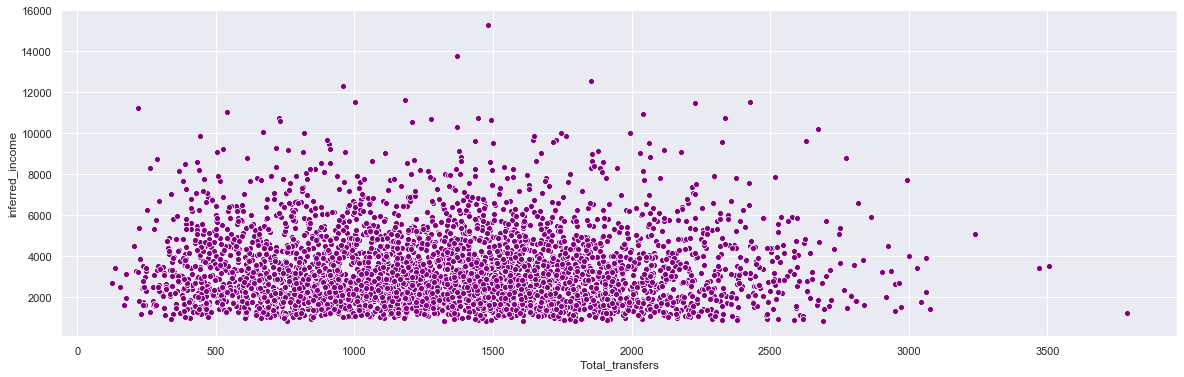

In [179]:
sns.set(rc={"figure.figsize":(20, 6)})
sns.scatterplot(data=df, x="Total_transfers", y="inferred_income",color = 'purple')

We can see an even distribution of people with different agese  

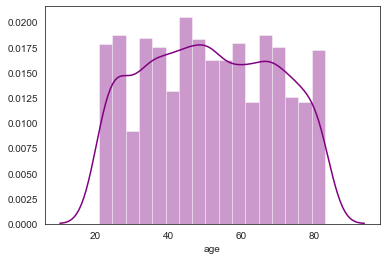

In [89]:
sns.distplot(df['age'],color = 'purple');

We have a larger ranges of purcahses with clients' credit card in the jewerly and arts segments, whereas the AP and AM States have also larger amounts ranges in purchases


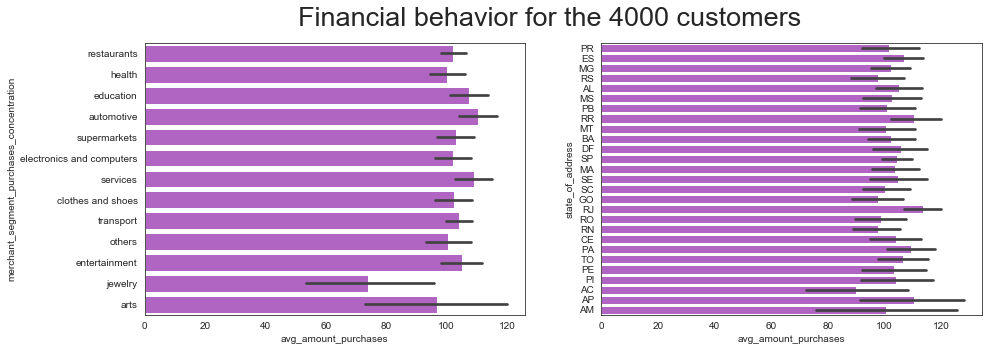

In [91]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.suptitle('Financial behavior for the 4000 customers', fontsize=27)
sns.barplot(y ='merchant_segment_purchases_concentration',x= 'avg_amount_purchases', data = df, ax=ax[0],color = 'mediumorchid');
sns.barplot(y ='state_of_address',x= 'avg_amount_purchases', data = df, ax=ax[1],color = 'mediumorchid');